Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None
First Few Rows of Dataset:
   Patient_ID  Age  Gender  Blood_Pressure  Cholesterol Diabetes Heart_Disease
0           1   69    Male            95.0        122.0       No            No
1           2   32    Male           129.0        191.0       No            No
2           3   89  Female           101.0        214.0       No            No
3           4   78  Female           142.0        203.0    

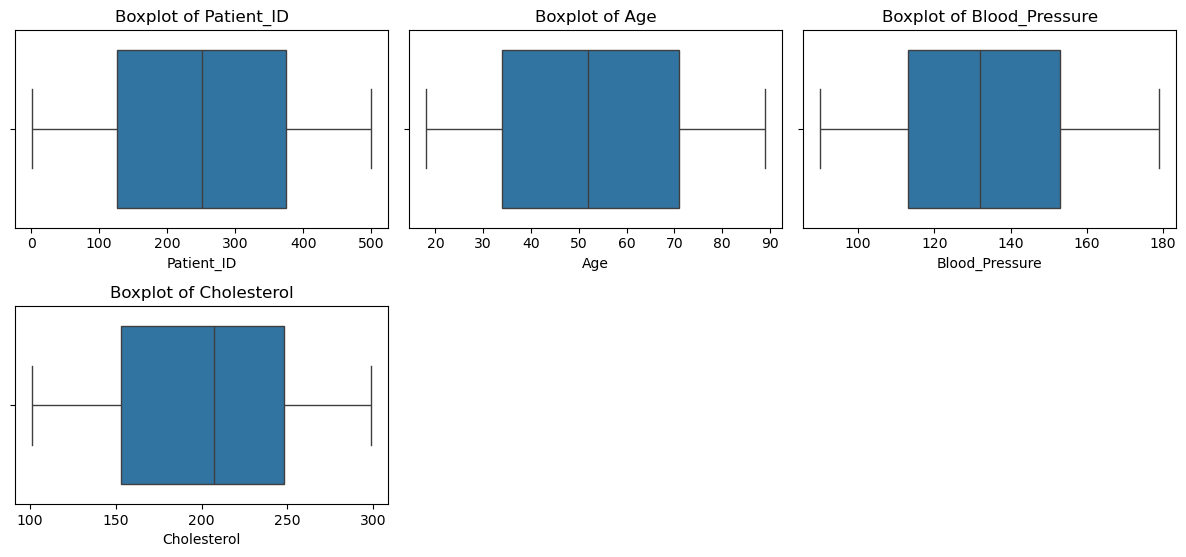

Missing Values After Imputation:
Patient_ID           500
Age                  500
Blood_Pressure       500
Cholesterol          500
Gender_Male            0
Diabetes_Yes           0
Heart_Disease_Yes      0
dtype: int64
Number of duplicate rows after cleaning: 492
Cleaned dataset saved as 'cleaned_healthcare_data.csv'


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
df = pd.read_csv('Day_16_Healthcare_Data.csv') 
print("Dataset Information:")
print(df.info()) 

print("First Few Rows of Dataset:")
print(df.head())  


missing_data = df.isna().sum()
missing_percentage = df.isna().mean() * 100

print("Missing Values Count:")
print(missing_data)

print("Percentage of Missing Values:")
print(missing_percentage)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')  
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

categorical_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')  
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")


df = df.drop_duplicates()

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1


df[numerical_cols] = df[numerical_cols].apply(
    lambda x: x.clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
)

df = pd.get_dummies(df, drop_first=True)

scaler = MinMaxScaler()  
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

missing_data_after = df.isna().sum()
print("Missing Values After Imputation:")
print(missing_data_after)

duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {duplicates_after}")

df.to_csv('cleaned_healthcare_data.csv', index=False)

print("Cleaned dataset saved as 'cleaned_healthcare_data.csv'")
